In [4]:
import numpy as np
import matplotlib.pyplot as plt

Seaborn is greate for doing quick plots, but it uses matplotlib under the hood. So understanding how matplotlib functions will allow for greater customization further on.

In order to create a plot we must first create a figure and then add axes to the figure. We initialize figures with `f = plt.figure()` and axes with `ax = fig.add_subplot(1,1,1)`. The first argument places the axes in the first cell of the table. The second and third argument create a table with n rows and m columns. 

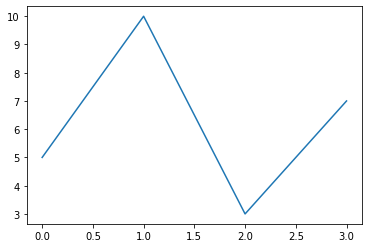

In [2]:
# Create a figure
f = plt.figure()

# (1, 1, 1): place axis in first cell of the table, 
# create a table with 1 row and 1 column.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
# ax.plot(list of x-values, list of y-values)
ax.plot([0, 1, 2, 3], [5, 10, 3, 7])

# Show the plot.
plt.show()

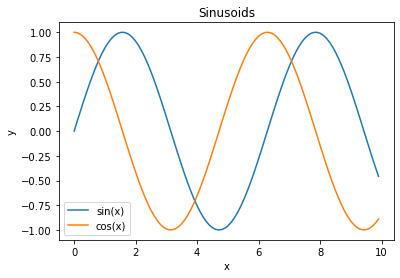

In [9]:
f = plt.figure()
ax = f.add_subplot(1, 1, 1)

# from 0 to 10 in 0.1 step increments
x = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show(); # include the semicolon to remove text that appears when outputing plot

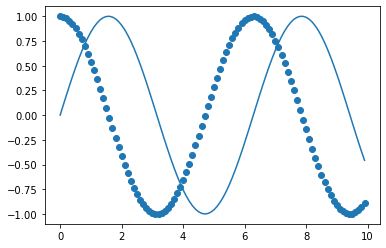

In [11]:
# shorthand to create figure and axes and call ax.plot
plt.plot(x, np.sin(x))

# When multiple plt methods are called in the same
# cell, the existing figure and axes are reused.
plt.scatter(x, np.cos(x));

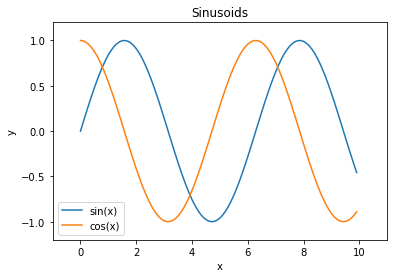

In [13]:
# Using plt shortcut to recreate the model from above
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

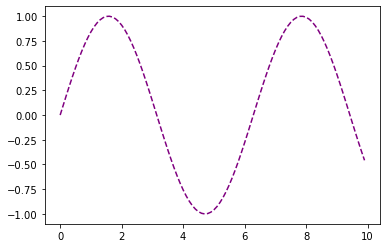

In [14]:
# change the color and line style
plt.plot(x, np.sin(x), linestyle='--', color='purple');

Commands that add text to the x and y axes.

| axis commands | What it does |
|-------|--------------|
|`set_title()` | add a title |
|`set_xlabel()`| add a x-axis label|
|`set_ylabel()`| add a y-axis label|
|`text()`| add text at an arbitrary location|
|`annotate()`| add an annotation, with optional arrow|


Commands that act on the whole figure

| figure commands | What it does |
|-----------------|--------------|
|`figtext()` | add text at an arbitrary location |
|`suptitle()` | add a title |

Any field can contain LaTeX expressions as long as they are enclosed in `$` signs.

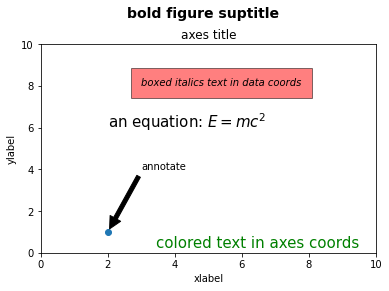

In [23]:
# initialize figure
fig = plt.figure()

# add figure title
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# initialize ax
ax = fig.add_subplot(1, 1, 1)

# adjust ratio of plot
fig.subplots_adjust(top=0.85)

# add axis title
ax.set_title('axes title')

# set x,y labels
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# add boxed text
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
       bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# add LaTeX equation
ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

# add colored text
ax.text(0.95, 0.01, 'colored text in axes coords',
       verticalalignment='bottom',
       horizontalalignment='right',
       transform=ax.transAxes,
       color='green',
       fontsize=15)

# add a dot at point (2, 1)
ax.plot([2], [1], 'o')

# add small text
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

# set x limit from 0-10 and y limit from 0-10
ax.axis([0, 10, 0, 10])

plt.show();

Now that we have a basic understanding of how matplotlib works we can use it to customize our seaborn plots.

In [25]:
import seaborn as sns
sns.set()
sns.set_context('talk')

# load dataset
df = sns.load_dataset('titanic').dropna().reset_index(drop=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


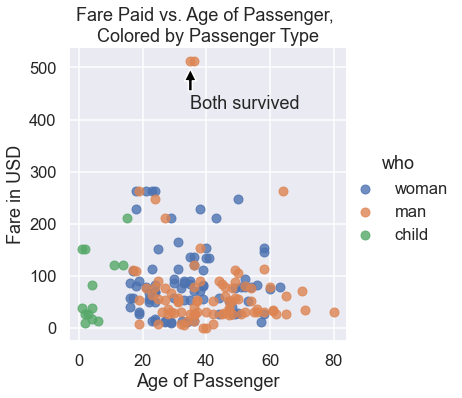

In [32]:
sns.lmplot(x='age', y='fare', hue='who', data=df, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, \nColored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35,500), xytext=(35,420),
            arrowprops=dict(facecolor='black', shrink=0.05));